In [114]:
import os
import json
from pathlib import Path
from IPython.display import display
from PIL import Image
import pandas as pd

# Import all necessary modules
from inference_detect_notation import detect_music_notation
from link_obj import MusicSymbolLinker
from pitch_identification import PitchIdentifier
from visualisation import visualize_pitched_score
from staff_line_detector import EnhancedStaffDetector
from stem_detector import OMREnhancer, overlay_detections_on_image
from stem_detector import load_json, save_json_file


In [105]:
# Define paths for your test image and model
image_path = "/homes/es314/omr-objdet-benchmark/scripts/encoding/clean_full_pipeline/examples/12-Etudes-001.png"
model_path = "/import/c4dm-05/elona/faster-rcnn-models-march-2025/yolo8runs/train-202-24classes-yolo-9654-data-splits/weights/81-best.pt"
class_mapping_file = "/homes/es314/omr-objdet-benchmark/data/class_mapping.json"
img_stem = Path(image_path).stem

In [106]:
from tempfile import TemporaryDirectory

tmp = TemporaryDirectory()
object_output_dir = Path(tmp.name) / "objects"
object_output_dir.mkdir(parents=True, exist_ok=True)

detect_music_notation(model_path, image_path, class_mapping_file, str(object_output_dir))
object_json = object_output_dir / f"{img_stem}_detections.json"

with open(object_json) as f:
    object_detections = json.load(f)
    
pd.DataFrame(object_detections['detections']).hevad()

Processing with parameters:
  - Model path: /import/c4dm-05/elona/faster-rcnn-models-march-2025/yolo8runs/train-202-24classes-yolo-9654-data-splits/weights/81-best.pt
  - Image path: /homes/es314/omr-objdet-benchmark/scripts/encoding/clean_full_pipeline/examples/12-Etudes-001.png
  - Class mapping: /homes/es314/omr-objdet-benchmark/data/class_mapping.json
  - Output directory: /tmp/tmpz6q242dv/objects
  - Confidence threshold: 0.25
  - Max detections: 600
  - IoU threshold: 0.35
Detected model type: YOLO
Detected JSON class mapping file for YOLO
Successfully loaded 201 class names

image 1/1 /homes/es314/omr-objdet-benchmark/scripts/encoding/clean_full_pipeline/examples/12-Etudes-001.png: 1280x928 252 noteheadBlacks, 32 beams, 18 accidentalSharps, 1 noteheadHalf, 3 accidentalNaturals, 7 gClef8vbs, 1 timeSigCommon, 76.7ms
Speed: 7.9ms preprocess, 76.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1280, 928)
Saved high-resolution detection result to /tmp/tmpz6q242dv/objects/12

,class_id,class_name,confidence,bbox
0,41,gClef8vb,0.965008,"{'x1': 559.6410522460938, 'y1': 637.8208007812..."
1,41,gClef8vb,0.964923,"{'x1': 345.63525390625, 'y1': 1032.56335449218..."
2,41,gClef8vb,0.960180,"{'x1': 345.6929931640625, 'y1': 1822.769165039..."
3,41,gClef8vb,0.960150,"{'x1': 345.80657958984375, 'y1': 1428.14562988..."
4,41,gClef8vb,0.959837,"{'x1': 345.6152038574219, 'y1': 2614.148925781..."


Step 1: Performing element-driven staff detection...
  clefs: 7
  noteheads: 253
  other: 54
Clef gclef8vb at y=637.8, spacing=20.58, lines=[664.3086221923828, 684.8877300688645, 705.4668379453461, 726.0459458218279, 746.6250536983096]
Clef gclef8vb at y=1032.6, spacing=20.58, lines=[1059.0508811035156, 1079.6299889799973, 1100.209096856479, 1120.7882047329606, 1141.3673126094423]
Clef gclef8vb at y=1428.1, spacing=20.58, lines=[1454.7726361083985, 1475.3517439848802, 1495.9308518613618, 1516.5099597378435, 1537.0890676143251]
Clef gclef8vb at y=1822.8, spacing=20.58, lines=[1849.3898232421875, 1869.9689311186692, 1890.5480389951508, 1911.1271468716325, 1931.7062547481141]
Clef gclef8vb at y=2217.7, spacing=20.58, lines=[2244.420784423828, 2264.99989230031, 2285.5790001767914, 2306.1581080532733, 2326.7372159297547]
Clef gclef8vb at y=2614.1, spacing=20.58, lines=[2640.70575, 2661.284857876482, 2681.8639657529634, 2702.4430736294453, 2723.0221815059267]
Clef gclef8vb at y=3008.9, spaci

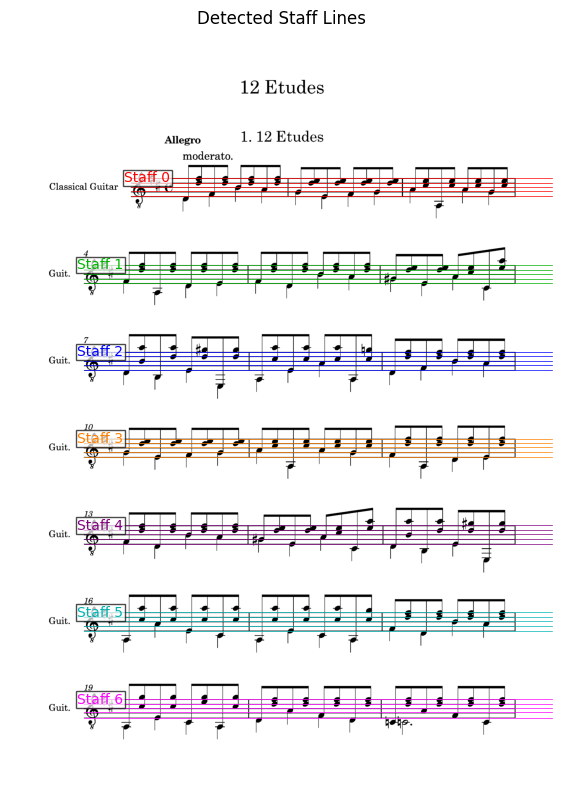

AttributeError: 'NoneType' object has no attribute 'read'

In [107]:
staff_detector = EnhancedStaffDetector(debug=True, pixel_perfect=True)
staff_data = staff_detector.detect(image_path, object_json)

# Visualize in notebook
staff_image = staff_detector.visualize(image_path, staff_data)
display(Image.open(staff_image))


In [108]:
enhancer = OMREnhancer(staff_data)
detections = object_detections.get("detections", [])
enhanced_detections = enhancer.enhance_detections(detections, image_path)

inferred_stems = [d for d in enhanced_detections if d.get("inferred", False) and d.get("class_name") == "stem"]
print(f"Inferred {len(inferred_stems)} stems")

pd.DataFrame(enhanced_detections).head(20)


Inferred 223 stems


,class_id,class_name,confidence,bbox,id,staff_system,beam_direction,inferred,beam_id,notehead_id,stem_direction,stem_inferred_via_beam,voice_id,associated_notehead_ids
0,41,gClef8vb,0.965008,"{'x1': 559.6410522460938, 'y1': 637.8208007812...",gClef8vb_0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41,gClef8vb,0.964923,"{'x1': 345.63525390625, 'y1': 1032.56335449218...",gClef8vb_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41,gClef8vb,0.960180,"{'x1': 345.6929931640625, 'y1': 1822.769165039...",gClef8vb_2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,gClef8vb,0.960150,"{'x1': 345.80657958984375, 'y1': 1428.14562988...",gClef8vb_3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,gClef8vb,0.959837,"{'x1': 345.6152038574219, 'y1': 2614.148925781...",gClef8vb_4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,41,gClef8vb,0.959348,"{'x1': 345.7972412109375, 'y1': 2217.729492187...",gClef8vb_5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,41,gClef8vb,0.958006,"{'x1': 345.6586608886719, 'y1': 3008.908203125...",gClef8vb_6,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,noteheadBlack,0.942024,"{'x1': 1405.0091552734375, 'y1': 1498.04089355...",noteheadBlack_7,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,59,timeSigCommon,0.941750,"{'x1': 703.6519165039062, 'y1': 688.3494873046...",timeSigCommon_8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,noteheadBlack,0.941255,"{'x1': 611.406494140625, 'y1': 1851.4149169921...",noteheadBlack_9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
merged_data = {
    "staffs": staff_data.get("staff_systems", []),
    "detections": enhanced_detections
}
print(f"Merged {len(merged_data['detections'])} detections")

Merged 537 detections


No staff lines detected. Cannot proceed with staff identification.
No staff lines detected. Cannot proceed with staff identification.
No staff lines detected. Cannot proceed with staff identification.
Identifying note groups...
Linking accidentals to notes...
Saved visualization to /tmp/tmpz6q242dv/linked_temp_linked_visualization.png
Saved linked data to /tmp/tmpz6q242dv/linked_temp_linked_data.json


""


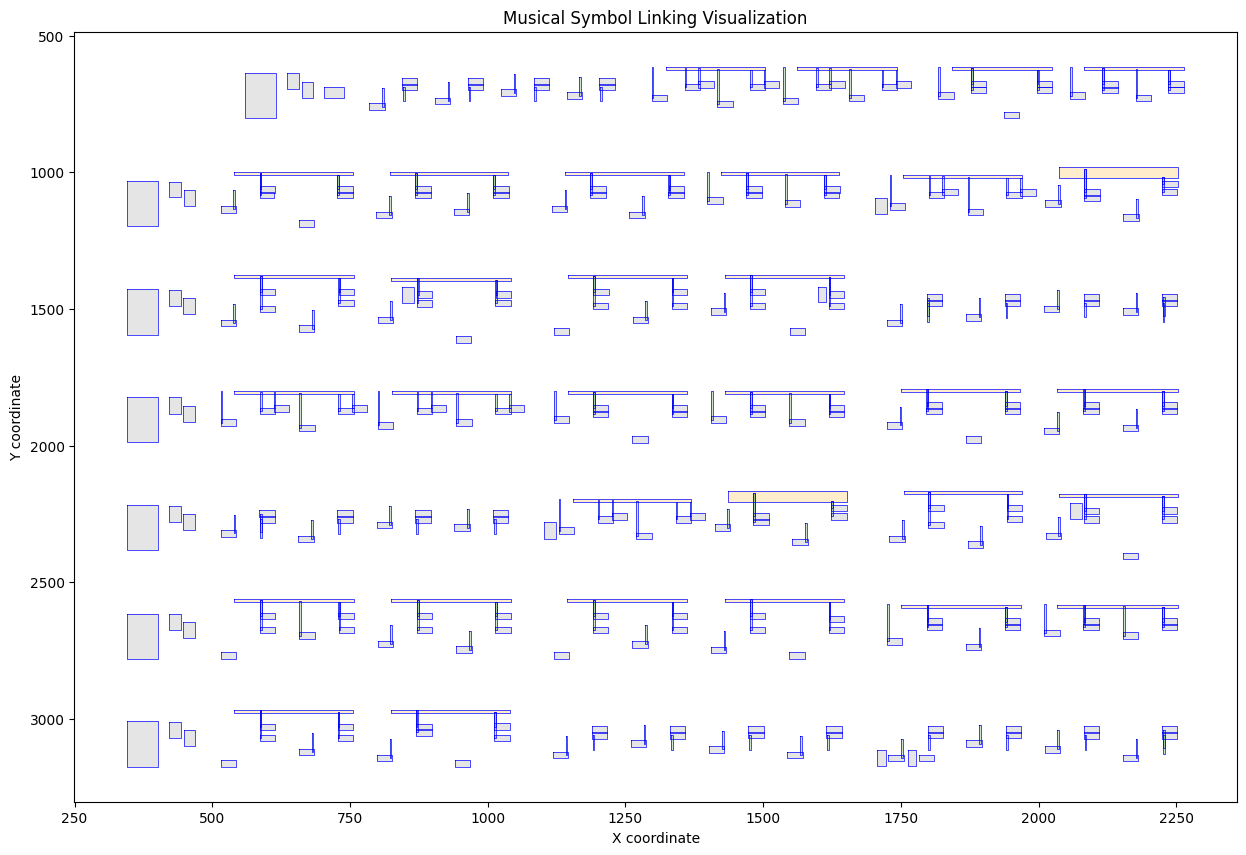

In [110]:
with (Path(tmp.name) / "linked_temp.json").open("w") as f:
    json.dump(merged_data, f)

linker = MusicSymbolLinker(Path(tmp.name) / "linked_temp.json")
linked_data = linker.process(Path(tmp.name))

linked_df = pd.DataFrame(linked_data["detections"])
linked_df.head()


In [111]:
identifier = PitchIdentifier(debug=True)
pitched_output_path = Path(tmp.name) / "pitched.json"
identifier.process_file(Path(tmp.name) / "linked_temp.json", pitched_output_path)

with open(pitched_output_path) as f:
    pitched_data = json.load(f)

pitched_df = pd.DataFrame(pitched_data["detections"])
pitched_df[["class_name", "pitch", "bbox"]].head()


[PitchIdentifier] Starting pitch identification...
[PitchIdentifier] Symbol counts: {'gClef8vb': 7, 'noteheadBlack': 252, 'timeSigCommon': 1, 'beam': 32, 'accidentalSharp': 18, 'noteheadHalf': 1, 'accidentalNatural': 3, 'stem': 223}
[PitchIdentifier] Found 0 staff lines
[PitchIdentifier] Grouped staff lines into 0 staff systems
[PitchIdentifier] Grouped all symbols into 7 staff systems
[PitchIdentifier] Processing staff system 0 with 70 symbols
[PitchIdentifier] Processing staff system 1 with 74 symbols
[PitchIdentifier] Processing staff system 3 with 71 symbols
[PitchIdentifier] Processing staff system 2 with 69 symbols
[PitchIdentifier] Processing staff system 5 with 69 symbols
[PitchIdentifier] Processing staff system 4 with 72 symbols
[PitchIdentifier] Processing staff system 6 with 67 symbols


,class_name,pitch,bbox
0,gClef8vb,NaN,"{'x1': 559.6410522460938, 'y1': 637.8208007812..."
1,gClef8vb,NaN,"{'x1': 345.63525390625, 'y1': 1032.56335449218..."
2,gClef8vb,NaN,"{'x1': 345.6929931640625, 'y1': 1822.769165039..."
3,gClef8vb,NaN,"{'x1': 345.80657958984375, 'y1': 1428.14562988..."
4,gClef8vb,NaN,"{'x1': 345.6152038574219, 'y1': 2614.148925781..."


In [112]:
final_viz_path = Path(tmp.name) / "pitched_viz.png"
visualize_pitched_score(image_path, pitched_output_path, final_viz_path)
display(Image.open(final_viz_path))


Visualizing: /homes/es314/omr-objdet-benchmark/scripts/encoding/clean_full_pipeline/examples/12-Etudes-001.png
Using data: /tmp/tmpz6q242dv/pitched.json
Successfully loaded image: (3504, 2475, 4)
Successfully loaded data
Found 253 noteheads, 239 with pitch information
Saved visualization to /tmp/tmpz6q242dv/pitched_viz.png


In [115]:
tmp.cleanup()  # Uncomment this to manually clean temporary files if needed

In [116]:
from music21 import converter, environment


In [119]:
from music21 import converter

score = converter.parse('/homes/es314/omr-objdet-benchmark/scripts/encoding/clean_full_pipeline/complete_pipeline_1/results/1-2-Kirschner_-_Chissà_che_cosa_pensa-001/musicxml/1-2-Kirschner_-_Chissà_che_cosa_pensa-001.musicxml')
score.show("text")  
# CLI-friendly


{0.0} <music21.metadata.Metadata object at 0x74e748903e80>
{0.0} <music21.stream.Part Classical Guitar>
    {0.0} <music21.instrument.Instrument 'P1: Classical Guitar: '>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.KeySignature of no sharps or flats>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest whole>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Rest whole>
    {8.0} <music21.stream.Measure 3 offset=8.0>
        {0.0} <music21.note.Rest whole>
    {12.0} <music21.stream.Measure 4 offset=12.0>
        {0.0} <music21.note.Rest whole>
    {16.0} <music21.stream.Measure 5 offset=16.0>
        {0.0} <music21.note.Rest whole>
    {20.0} <music21.stream.Measure 6 offset=20.0>
        {0.0} <music21.note.Rest whole>
    {24.0} <music21.stream.Measure 7 offset=24.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note E>
        {2.0} <music21

In [120]:
score.write('midi', fp='output.mid')


'output.mid'